<a href="https://colab.research.google.com/github/Krittipoom/FOR-fake-or-real-dataset-classification/blob/main/Part2%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library and Github repo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from PIL import Image
from google.colab import files

In [ ]:
!git clone https://github.com/Krittipoom/exhibition-visitor-behavior-ARM.git
!mv ./exhibition-visitor-behavior-ARM/* ./
!rm -r ./exhibition-visitor-behavior-ARM/

Cloning into 'amarin-customer-segment'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 115 (delta 40), reused 17 (delta 17), pack-reused 64
Receiving objects: 100% (115/115), 59.31 MiB | 37.12 MiB/s, done.
Resolving deltas: 100% (47/47), done.


# Getting Transformed Data

In [ ]:
!chmod 777 ./setup.sh
print('extracting transformed data ...')
!./setup.sh
!ls transformed_data.csv
print('transformed_data.csv <-- Transformed Data')

extracting transformed data ...
transformed_data.csv
transformed_data.csv <-- Transformed Data


do concat chunk of data to dataframe (load big data used too much ram)

In [ ]:
chunksize = 10 ** 6
df = pd.DataFrame()
for chunk in pd.read_csv('transformed_data.csv', chunksize=chunksize, skipinitialspace=True):
    df = pd.concat([df, chunk], ignore_index=True)

view data

In [ ]:
df.head()

,address,date,time,hours,minutes,alias_with_location,alias,location
0,00:00:00:00:00:00,2023-06-30,03:50,3,50,(A6) kidszoona,A6,kidszoona
1,00:00:00:00:00:00,2023-06-30,13:49,13,49,(B1) แข่งคลาน&บริการรถเข็น,B1,แข่งคลาน&บริการรถเข็น
2,00:00:00:00:00:00,2023-07-01,03:09,3,9,(B5) ประตู102,B5,ประตู102
3,00:00:00:00:00:00,2023-07-01,03:10,3,10,(B5) ประตู102,B5,ประตู102
4,00:00:00:00:00:00,2023-07-01,08:44,8,44,(B5) ประตู102,B5,ประตู102


# Exploratory Data Analysis

performing EDA

In [ ]:
df.head()

,address,date,time,hours,minutes,alias_with_location,alias,location
0,00:00:00:00:00:00,2023-06-30,03:50,3,50,(A6) kidszoona,A6,kidszoona
1,00:00:00:00:00:00,2023-06-30,13:49,13,49,(B1) แข่งคลาน&บริการรถเข็น,B1,แข่งคลาน&บริการรถเข็น
2,00:00:00:00:00:00,2023-07-01,03:09,3,9,(B5) ประตู102,B5,ประตู102
3,00:00:00:00:00:00,2023-07-01,03:10,3,10,(B5) ประตู102,B5,ประตู102
4,00:00:00:00:00:00,2023-07-01,08:44,8,44,(B5) ประตู102,B5,ประตู102


In [ ]:
df.describe()

,hours,minutes
count,3.541294e+06,3.541294e+06
mean,7.616546e+00,2.941921e+01
std,3.641575e+00,1.738277e+01
min,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.400000e+01
50%,8.000000e+00,2.900000e+01
75%,1.000000e+01,4.500000e+01
max,2.300000e+01,5.900000e+01


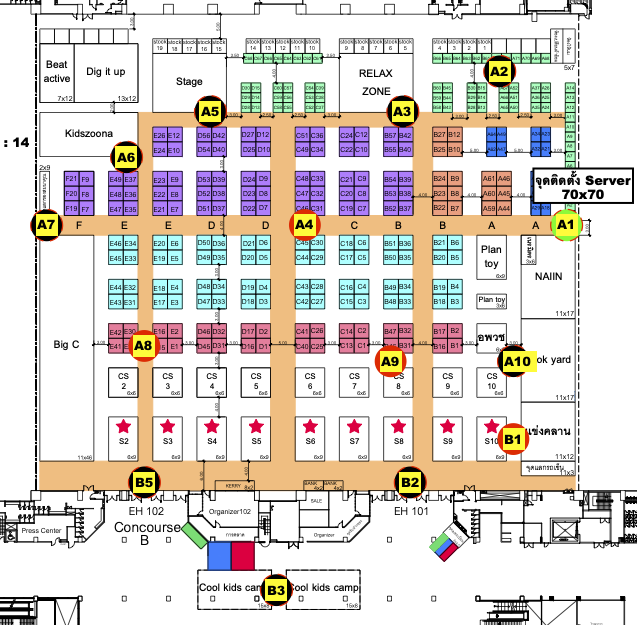

In [ ]:
img = Image.open('imgs/plan_abk25_beacon_map.png')
display(img)

## Using Pandas

In [ ]:
location_counts_df = df[['address', 'location']].drop_duplicates()['location'].value_counts().rename_axis('unique_location').reset_index(name='counts')
location_counts_df

,unique_location,counts
0,ประตู102,73125
1,เครื่องใช้ไฟฟ้า,53928
2,relax zone,51449
3,แข่งคลาน&บริการรถเข็น,48306
4,cool kids camp,40858
5,book yard,39364
6,kidszoona,36960
7,ทางเดินกลางงาน,35505
8,จุดแลกของสมนาคุณ,33280
9,stage,30386


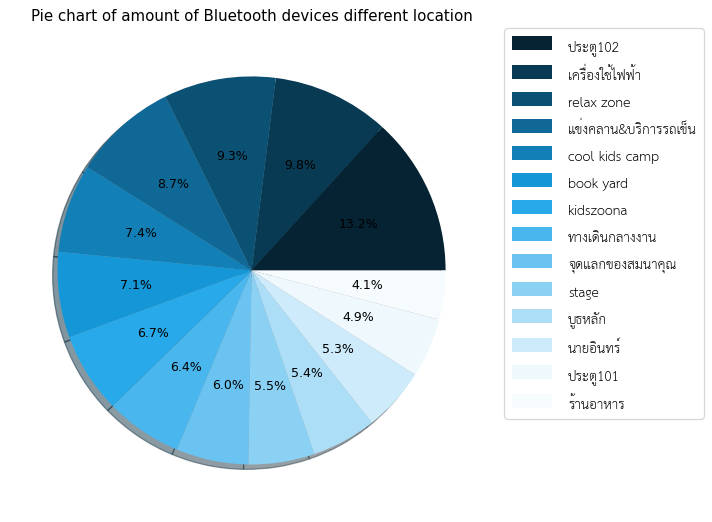

In [ ]:
fig = plt.figure(figsize=(9,7), dpi=90)
ax = plt.subplot(111)
colors = ['#052332','#083a53','#0b5174','#0f6895','#1280b6','#1597d7','#27a9ea','#49b6ed','#6ac3f0','#8bd1f4','#acdef7','#cdebfa','#eef8fd','#f6fbfe']
font = font_manager.FontProperties(fname='./THSarabun.ttf', style='normal', size=16)

data = df[['address', 'location']].drop_duplicates()['location'].value_counts()
ax = data.plot(ax=ax, colors=colors, kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Pie chart of amount of Bluetooth devices different location', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', prop=font)

plt.show()

In [ ]:
hw_timespend_df = df['location'].value_counts().rename_axis('unique_location').reset_index(name='timespend')
hw_timespend_df

,unique_location,timespend
0,ประตู102,453693
1,relax zone,352400
2,เครื่องใช้ไฟฟ้า,332959
3,แข่งคลาน&บริการรถเข็น,287474
4,cool kids camp,278004
5,kidszoona,256115
6,ทางเดินกลางงาน,254216
7,book yard,245149
8,stage,200709
9,จุดแลกของสมนาคุณ,194595


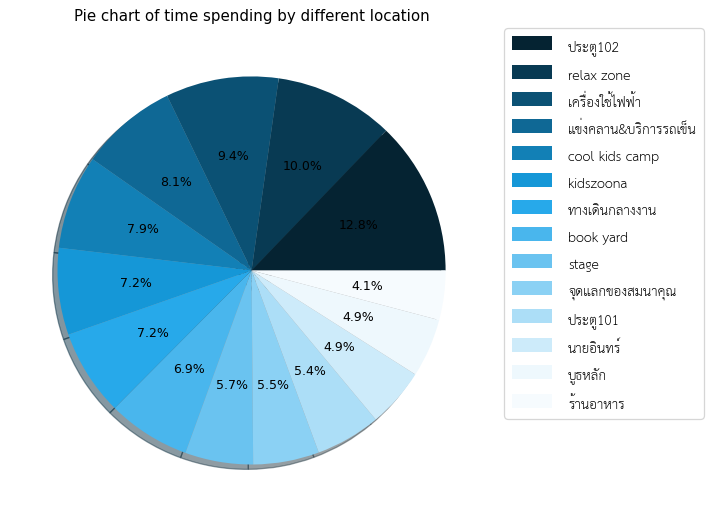

In [ ]:
fig = plt.figure(figsize=(9,7), dpi=90)
ax = plt.subplot(111)
colors = ['#052332','#083a53','#0b5174','#0f6895','#1280b6','#1597d7','#27a9ea','#49b6ed','#6ac3f0','#8bd1f4','#acdef7','#cdebfa','#eef8fd','#f6fbfe']
font = font_manager.FontProperties(fname='./THSarabun.ttf', style='normal', size=16)

data = df['location'].value_counts()
ax = data.plot(ax=ax, colors=colors, kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Pie chart of time spending by different location', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', prop=font)

plt.show()

In [ ]:
day_counts_df = df[['address', 'date']].drop_duplicates()['date'].value_counts().rename_axis('unique_date').reset_index(name='counts')
day_counts_df

,unique_date,counts
0,2023-07-02,139622
1,2023-07-01,137618
2,2023-06-29,124507
3,2023-06-30,122650
4,2023-06-28,1689
5,2023-06-27,153


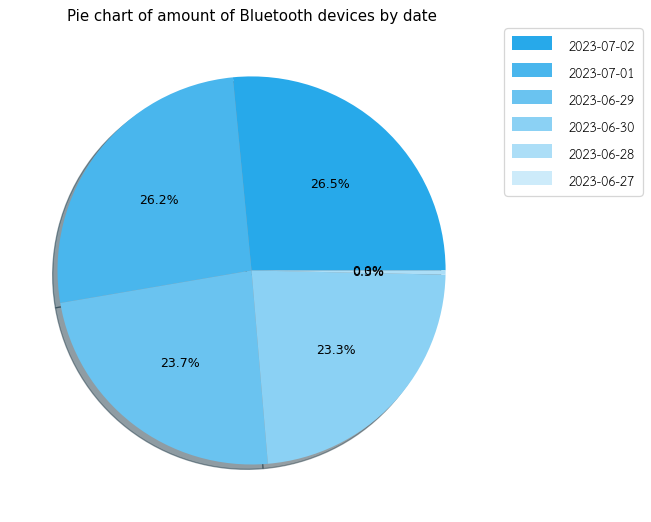

In [ ]:
fig = plt.figure(figsize=(9,7), dpi=90)
ax = plt.subplot(111)
colors = ['#27a9ea','#49b6ed','#6ac3f0','#8bd1f4','#acdef7','#cdebfa']
font = font_manager.FontProperties(fname='./THSarabun.ttf', style='normal', size=16)

data = df[['address', 'date']].drop_duplicates()['date'].value_counts()
ax = data.plot(ax=ax, colors=colors, kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Pie chart of amount of Bluetooth devices by date', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', prop=font)

plt.show()

In [ ]:
day_timespend_df = df['date'].value_counts().rename_axis('unique_date').reset_index(name='timespend')
day_timespend_df

,unique_date,timespend
0,2023-07-02,904311
1,2023-07-01,900578
2,2023-06-29,869185
3,2023-06-30,848751
4,2023-06-28,18028
5,2023-06-27,441


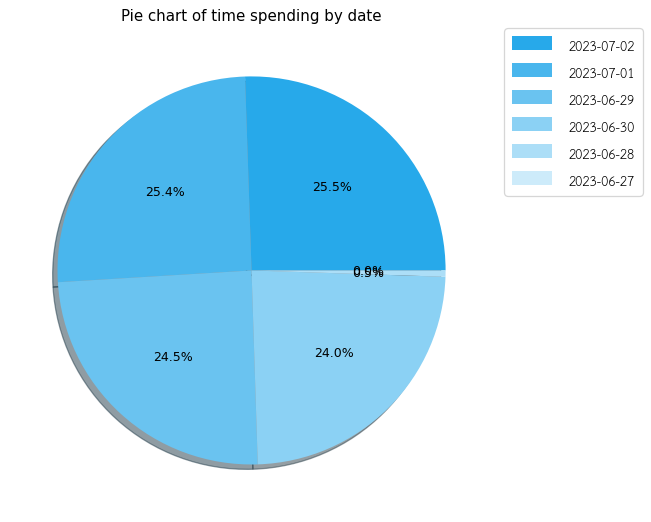

In [ ]:
fig = plt.figure(figsize=(9,7), dpi=90)
ax = plt.subplot(111)
colors = ['#27a9ea','#49b6ed','#6ac3f0','#8bd1f4','#acdef7','#cdebfa']
font = font_manager.FontProperties(fname='./THSarabun.ttf', style='normal', size=16)

data = df['date'].value_counts()
ax = data.plot(ax=ax, colors=colors, kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Pie chart of time spending by date', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', prop=font)

plt.show()

## Using Tableau

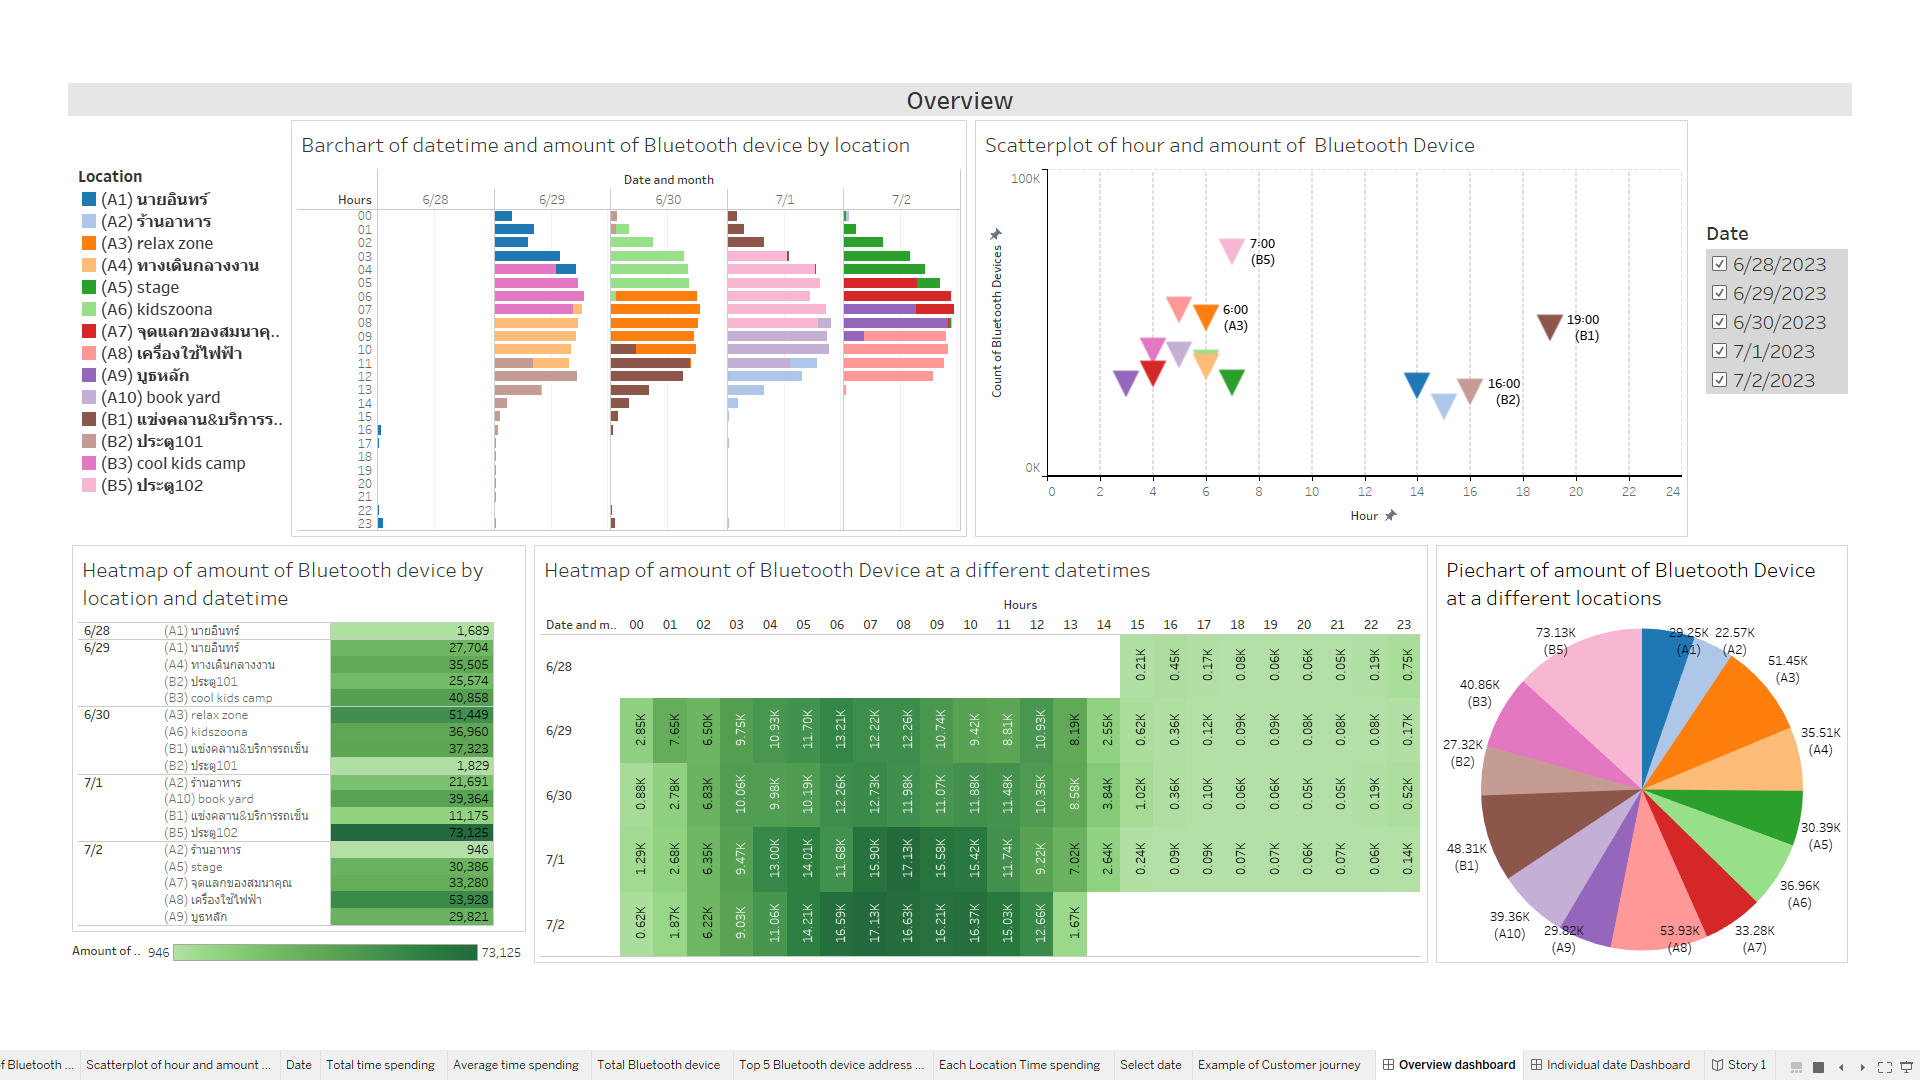

In [ ]:
img = Image.open('imgs/00.png')
display(img)

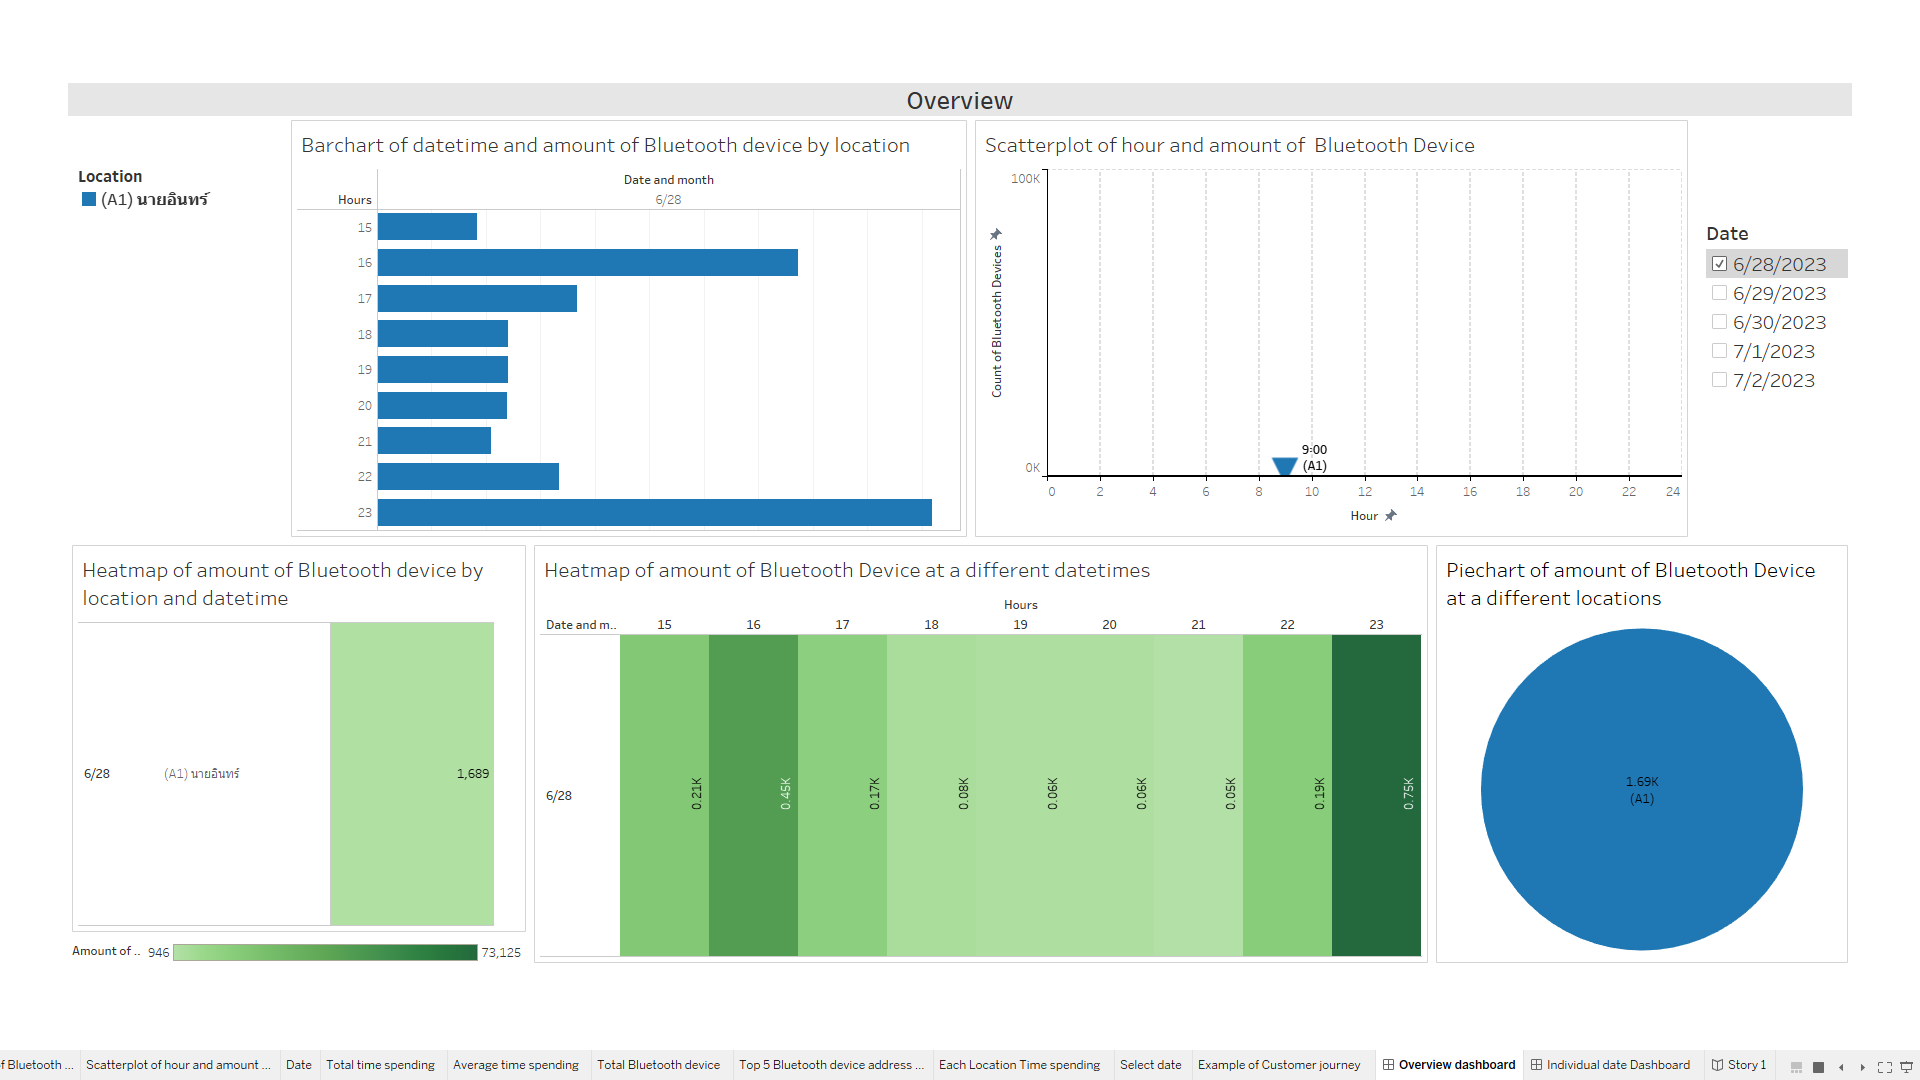

In [ ]:
img = Image.open('imgs/01.png')
display(img)

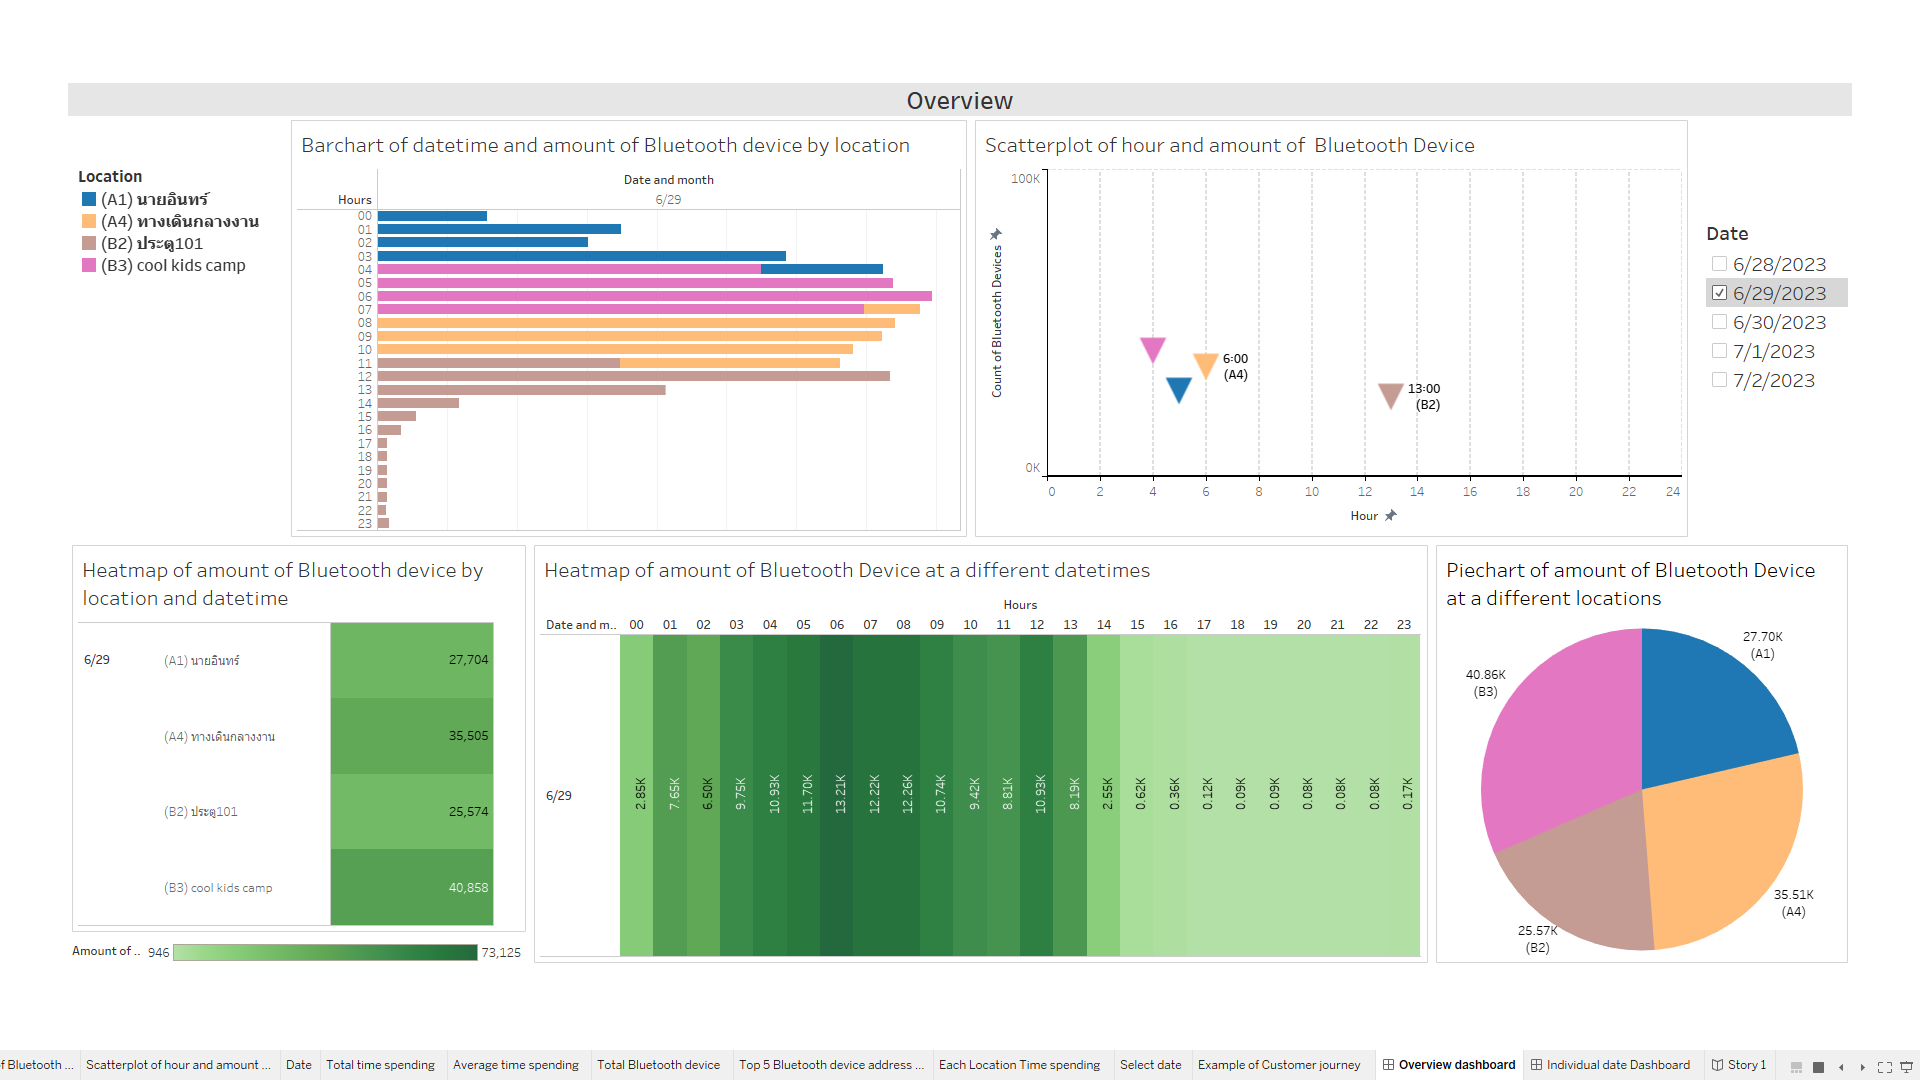

In [ ]:
img = Image.open('imgs/02.png')
display(img)

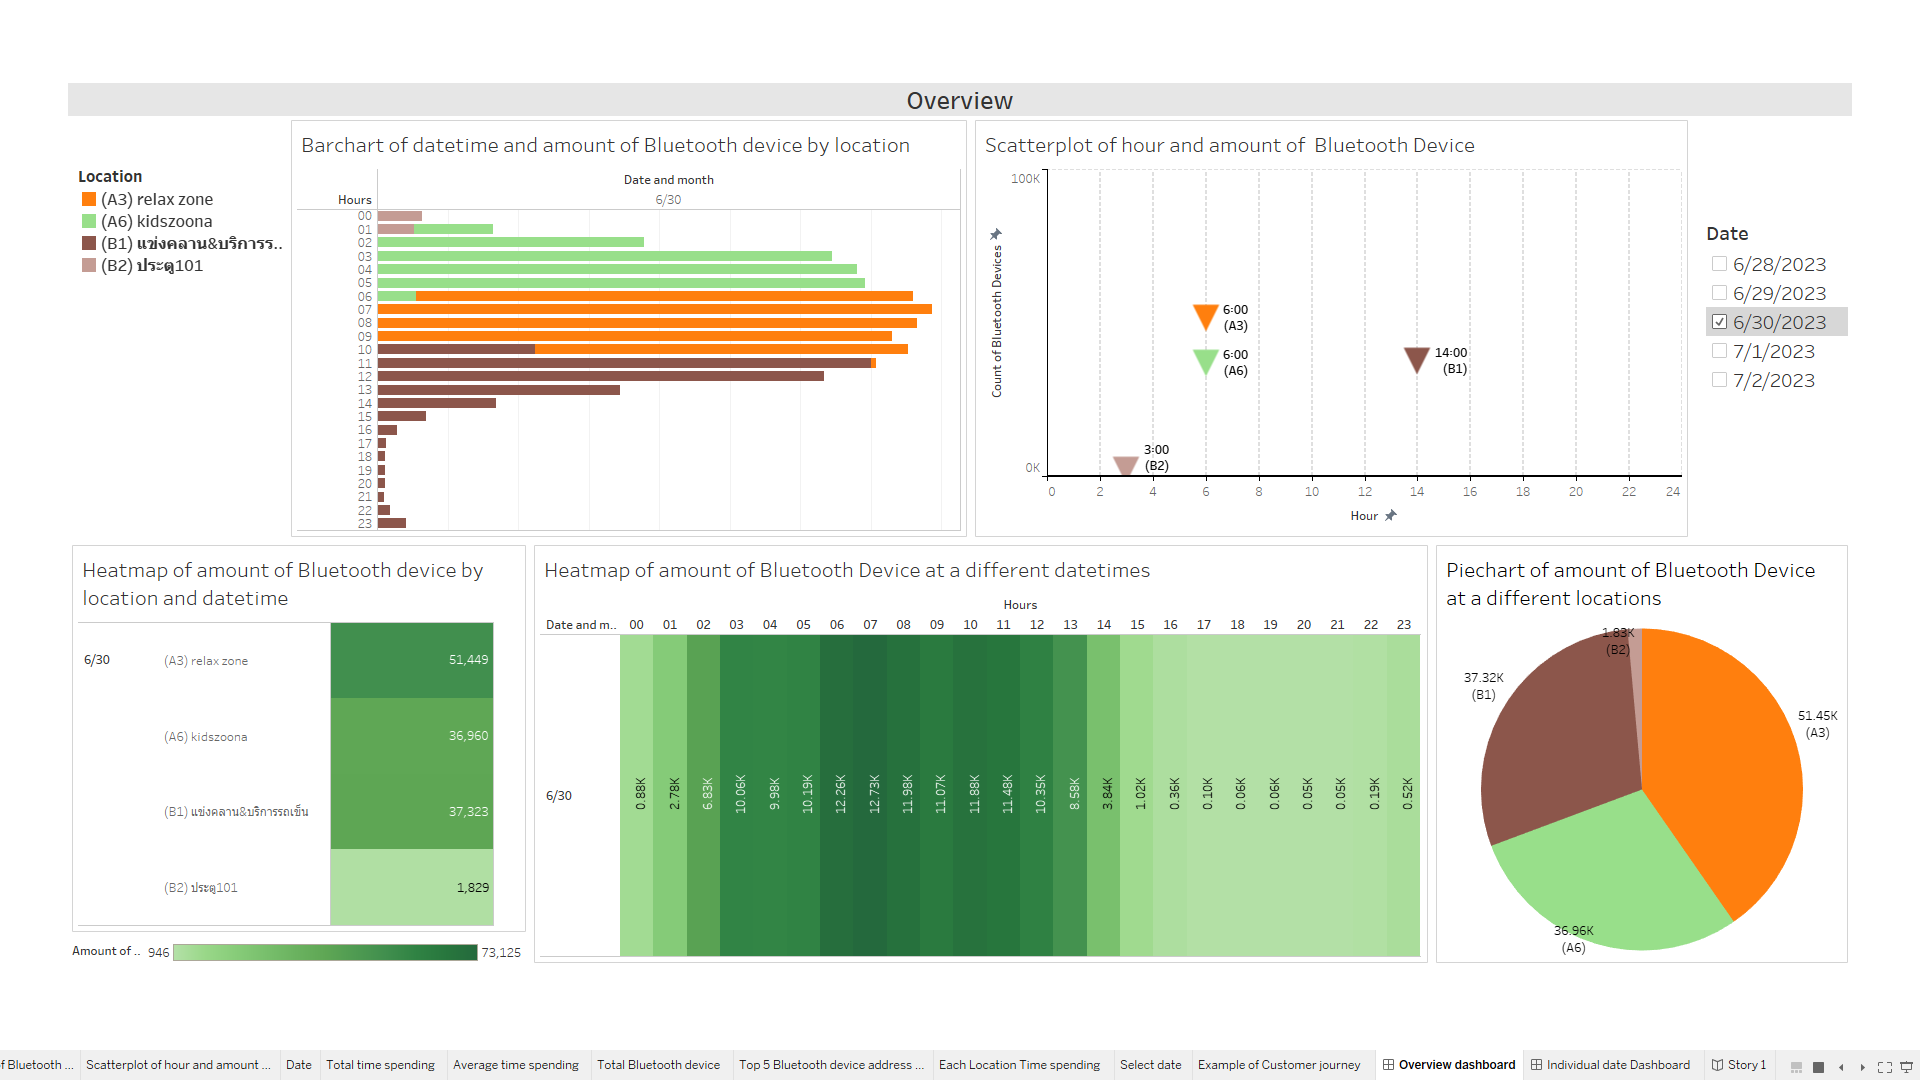

In [ ]:
img = Image.open('imgs/03.png')
display(img)

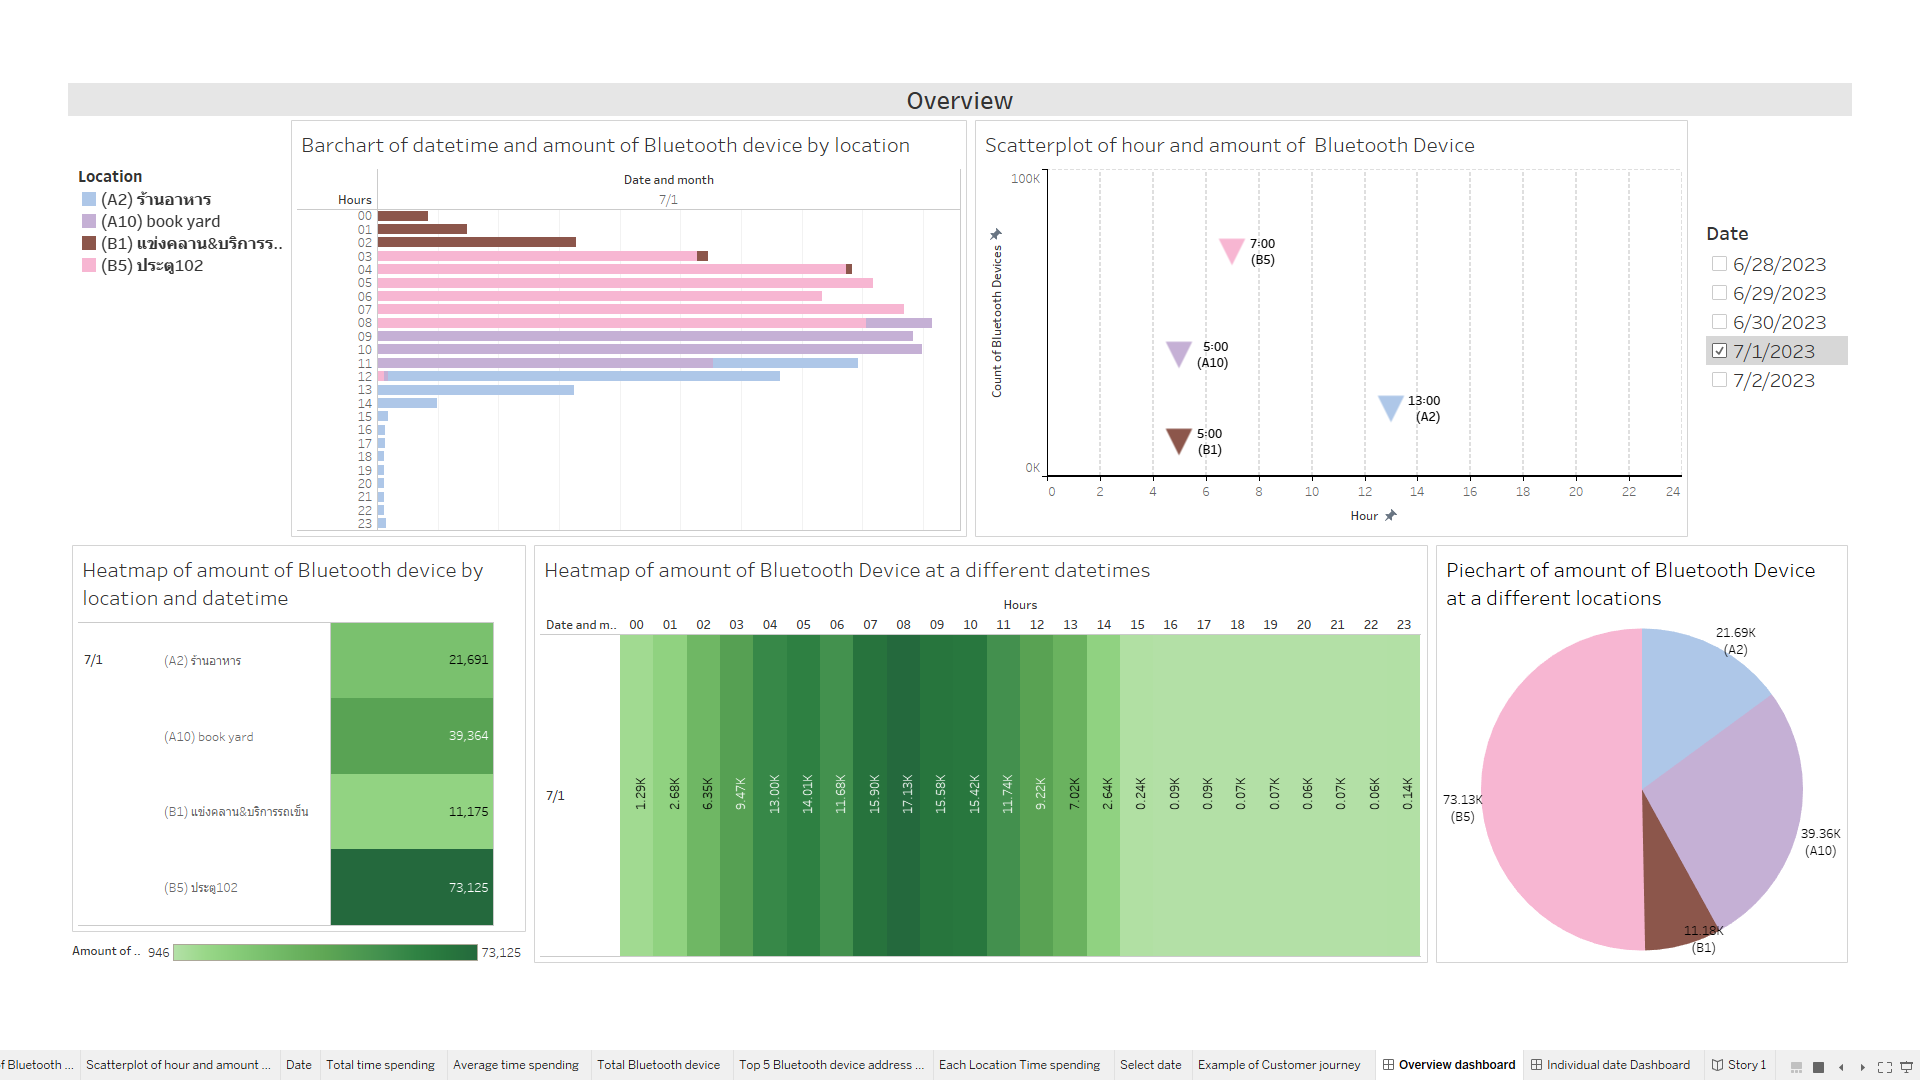

In [ ]:
img = Image.open('imgs/04.png')
display(img)

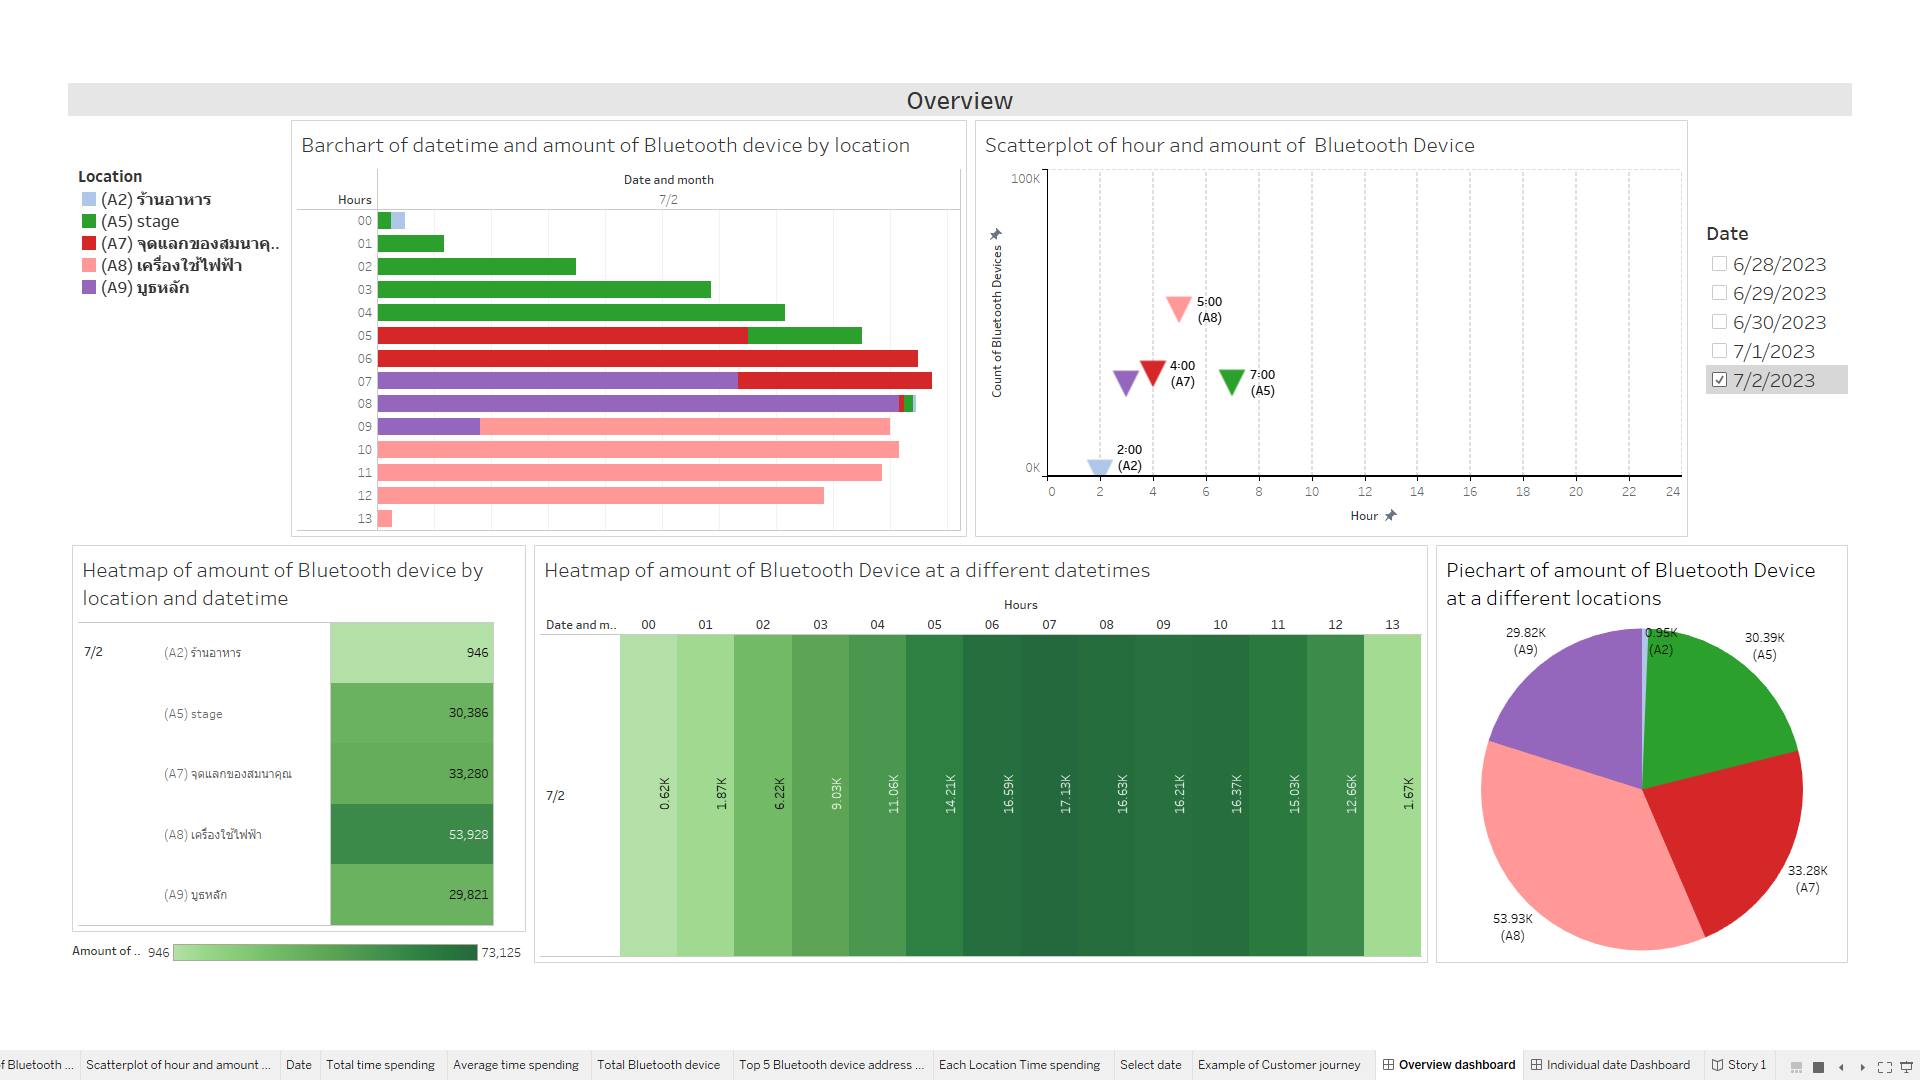

In [ ]:
img = Image.open('imgs/05.png')
display(img)

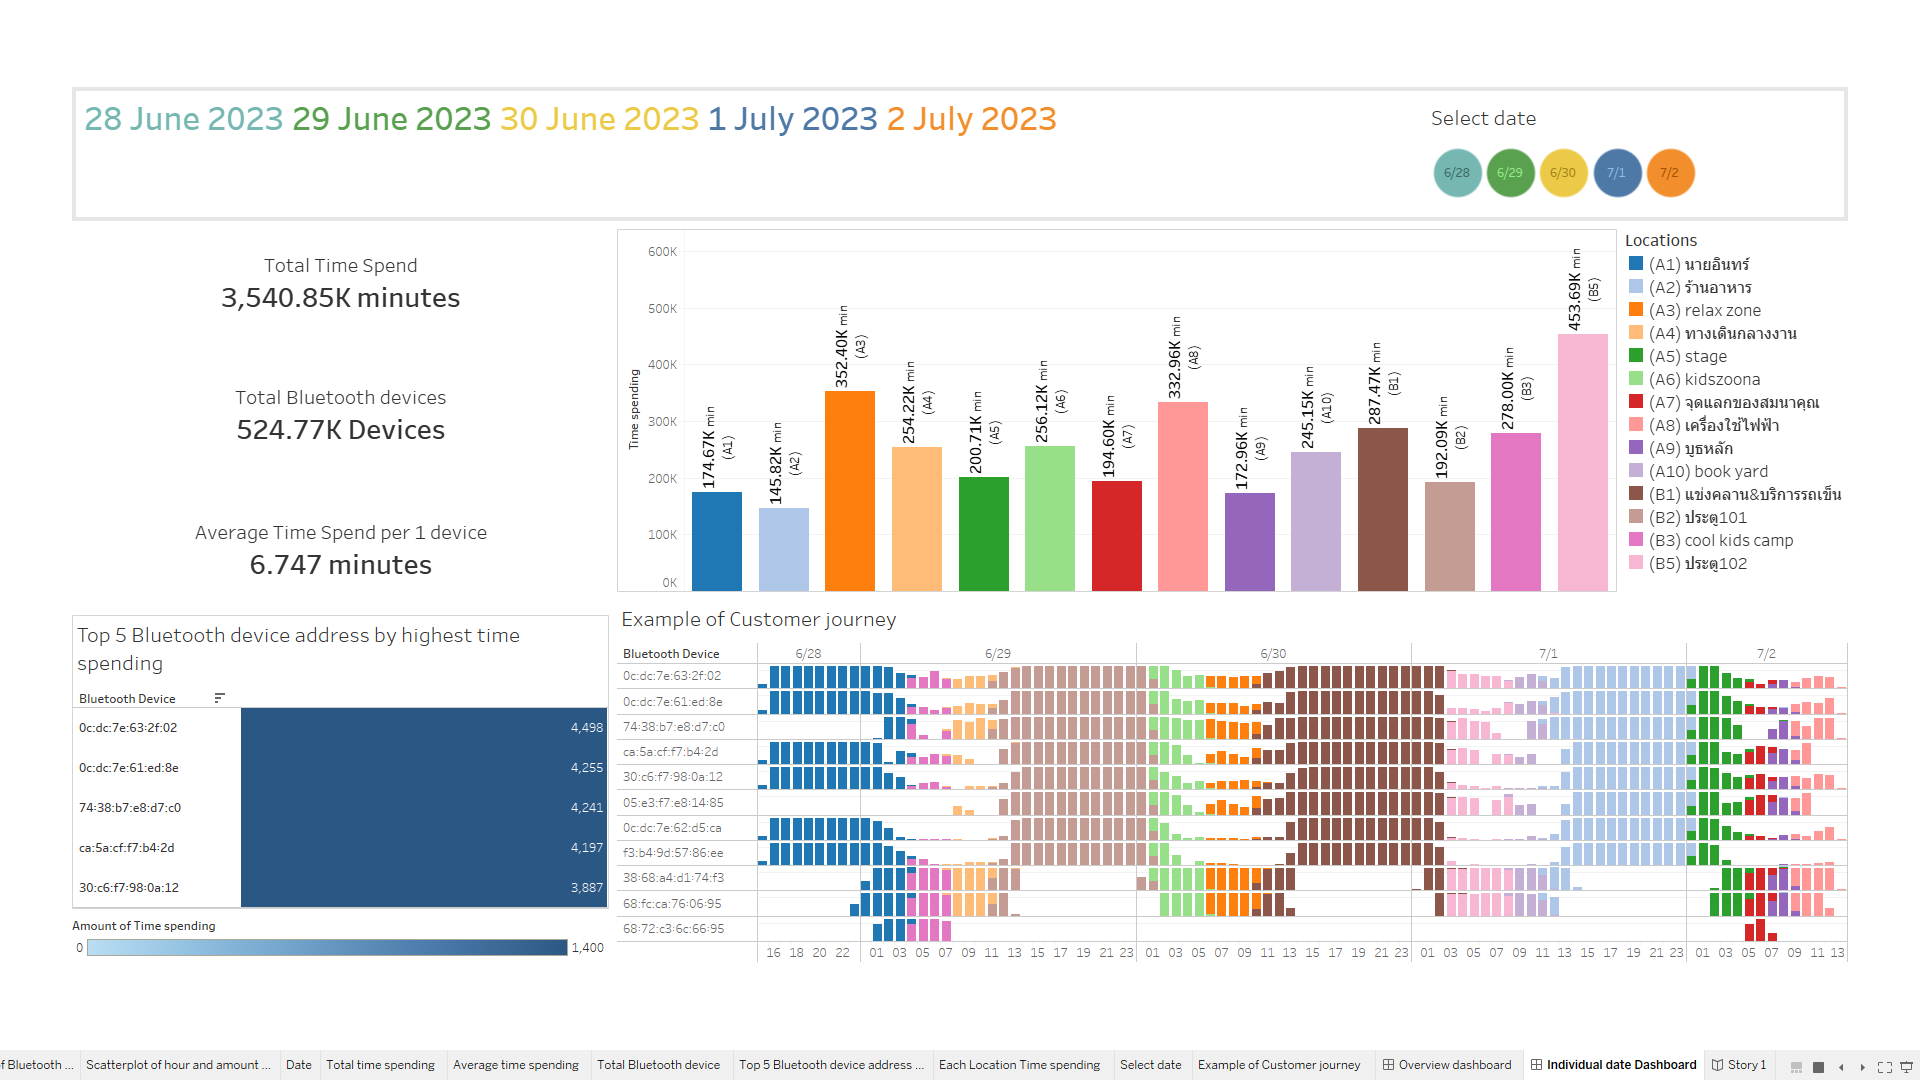

In [ ]:
img = Image.open('imgs/06.png')
display(img)

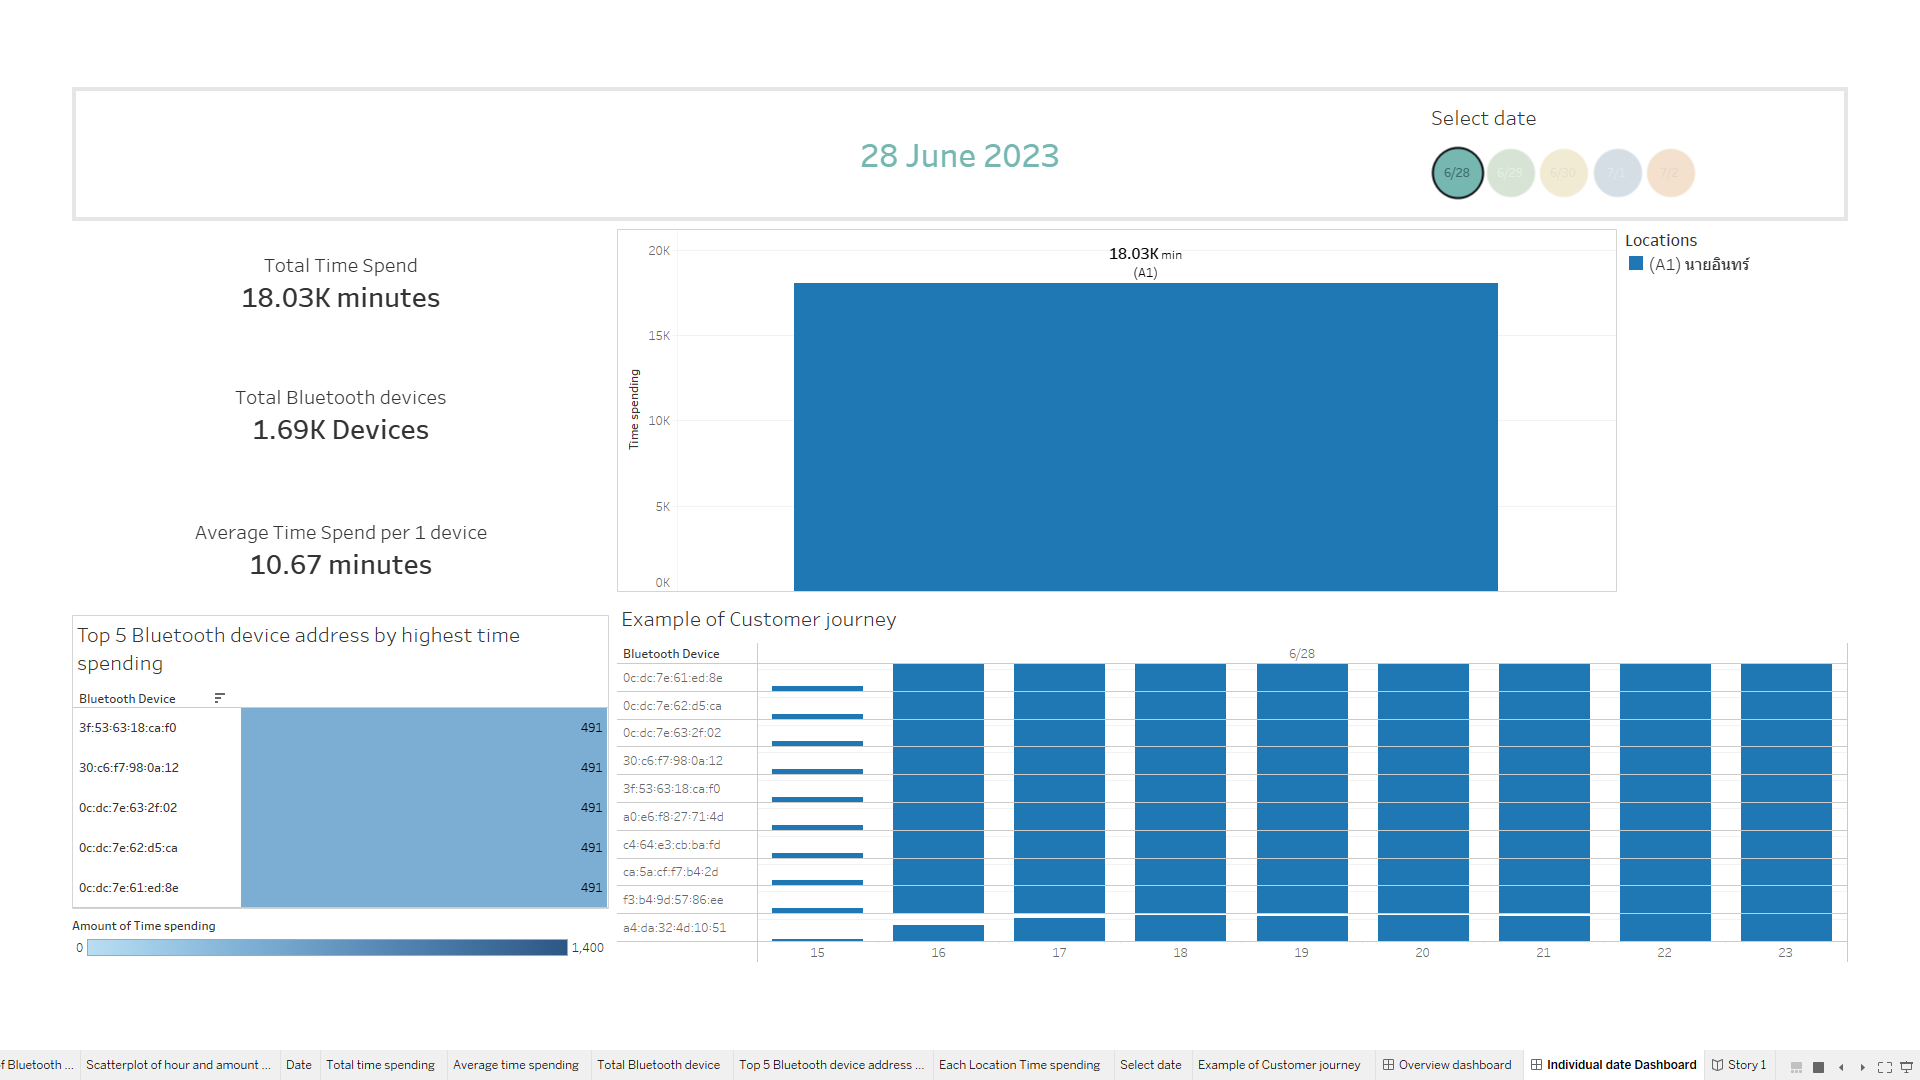

In [ ]:
img = Image.open('imgs/07.png')
display(img)

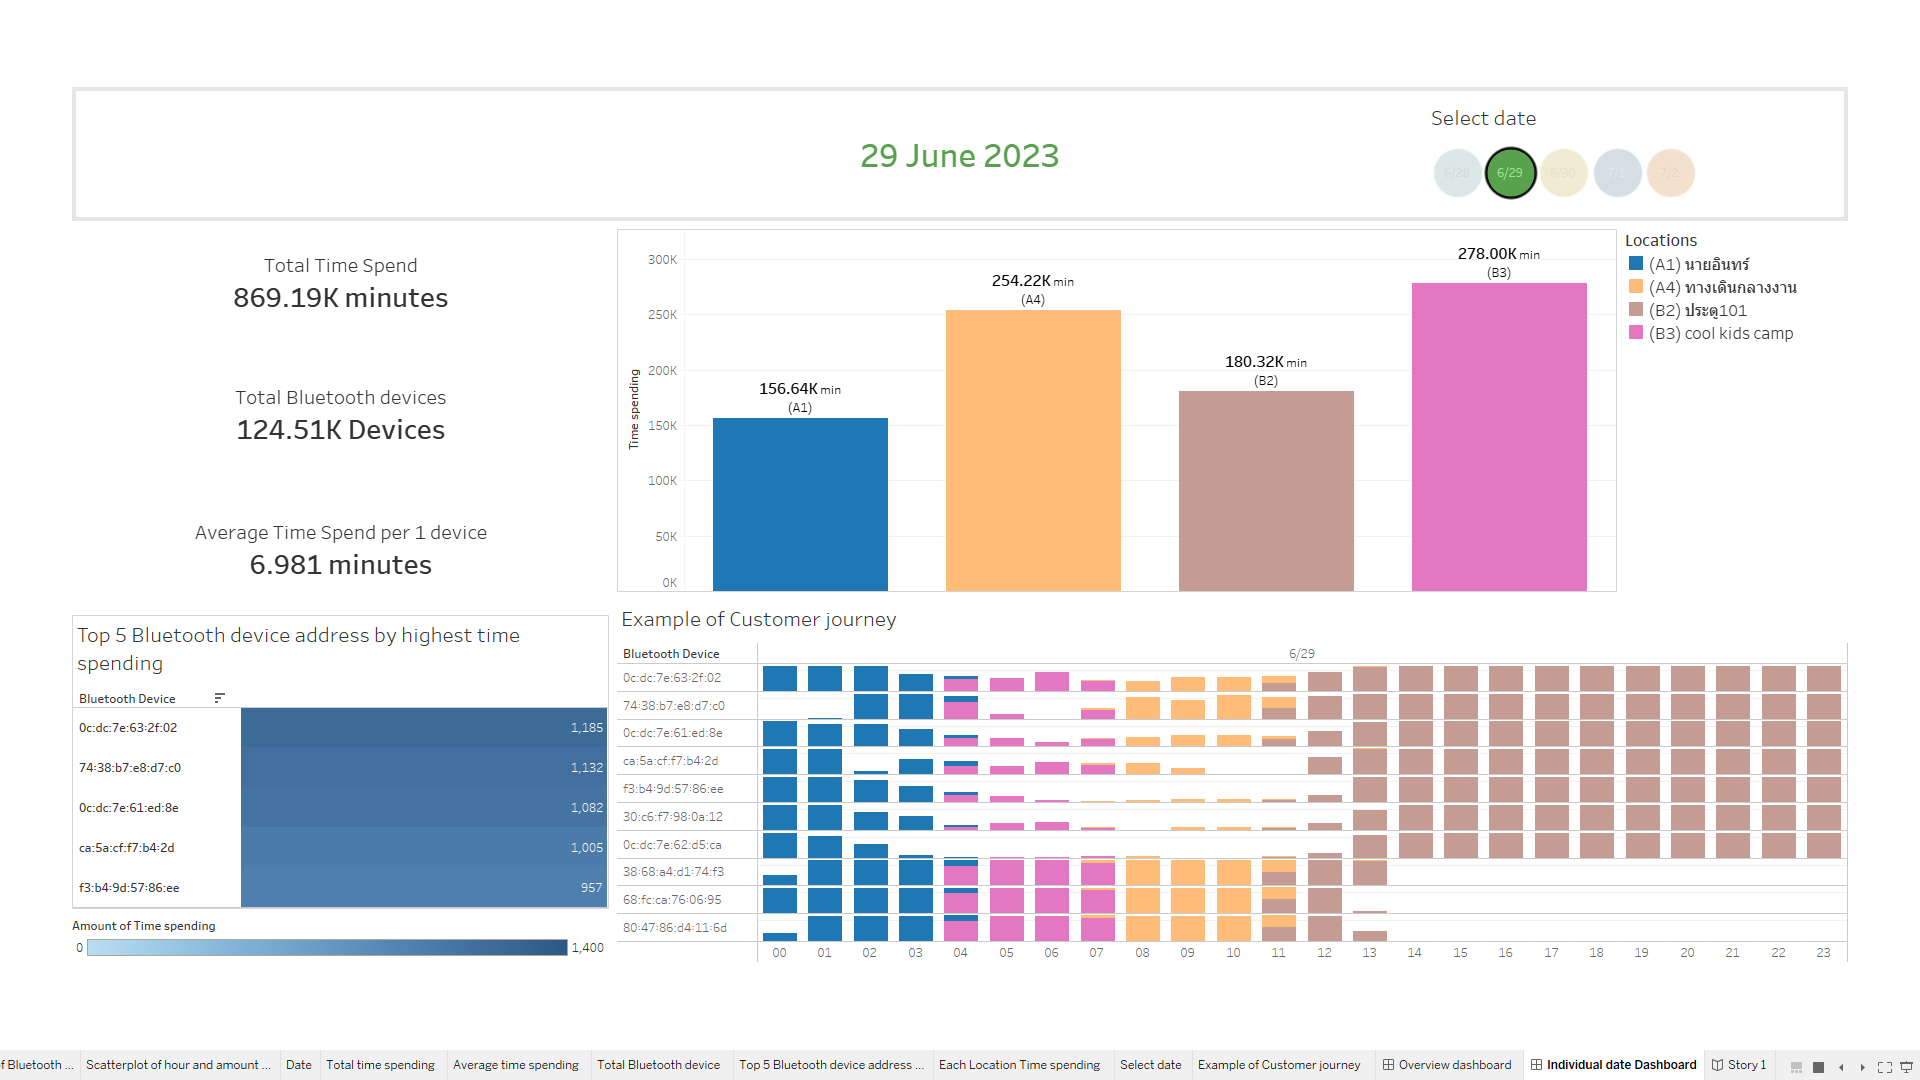

In [ ]:
img = Image.open('imgs/08.png')
display(img)

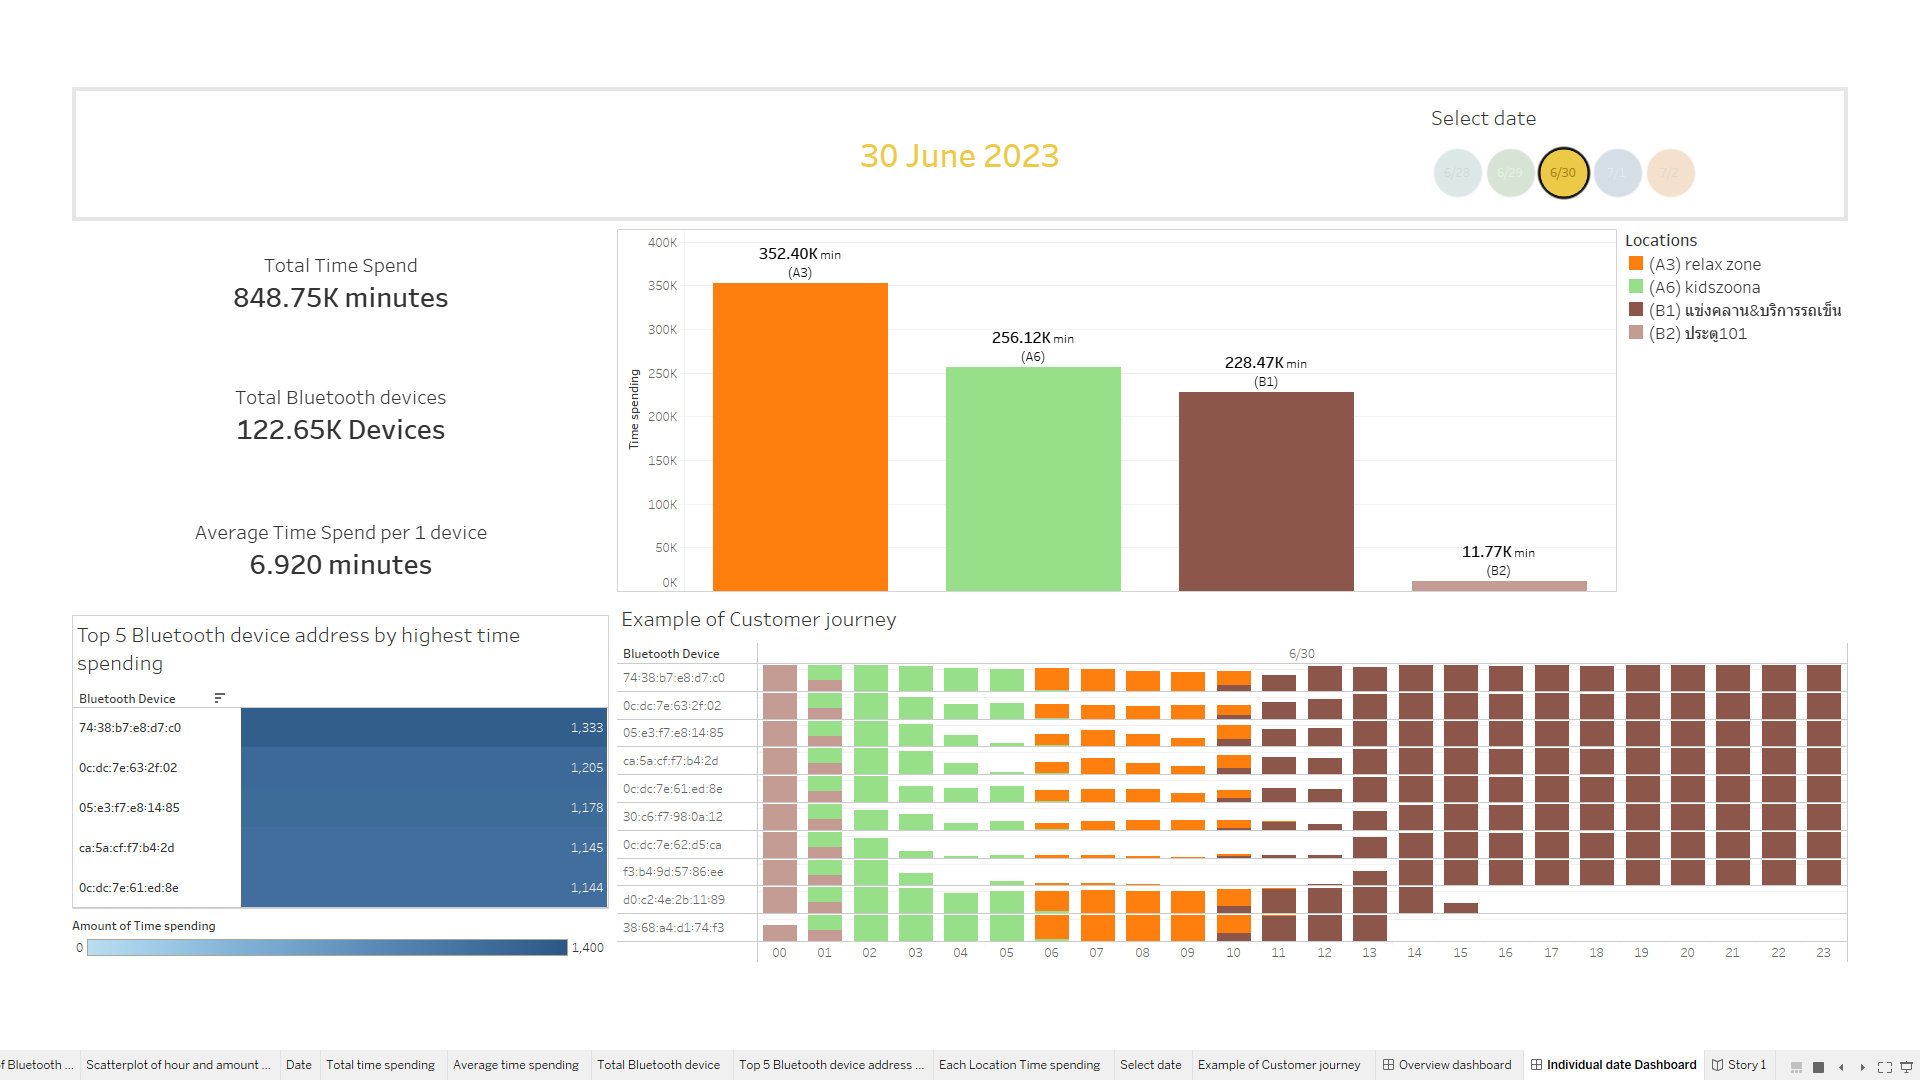

In [ ]:
img = Image.open('imgs/09.png')
display(img)

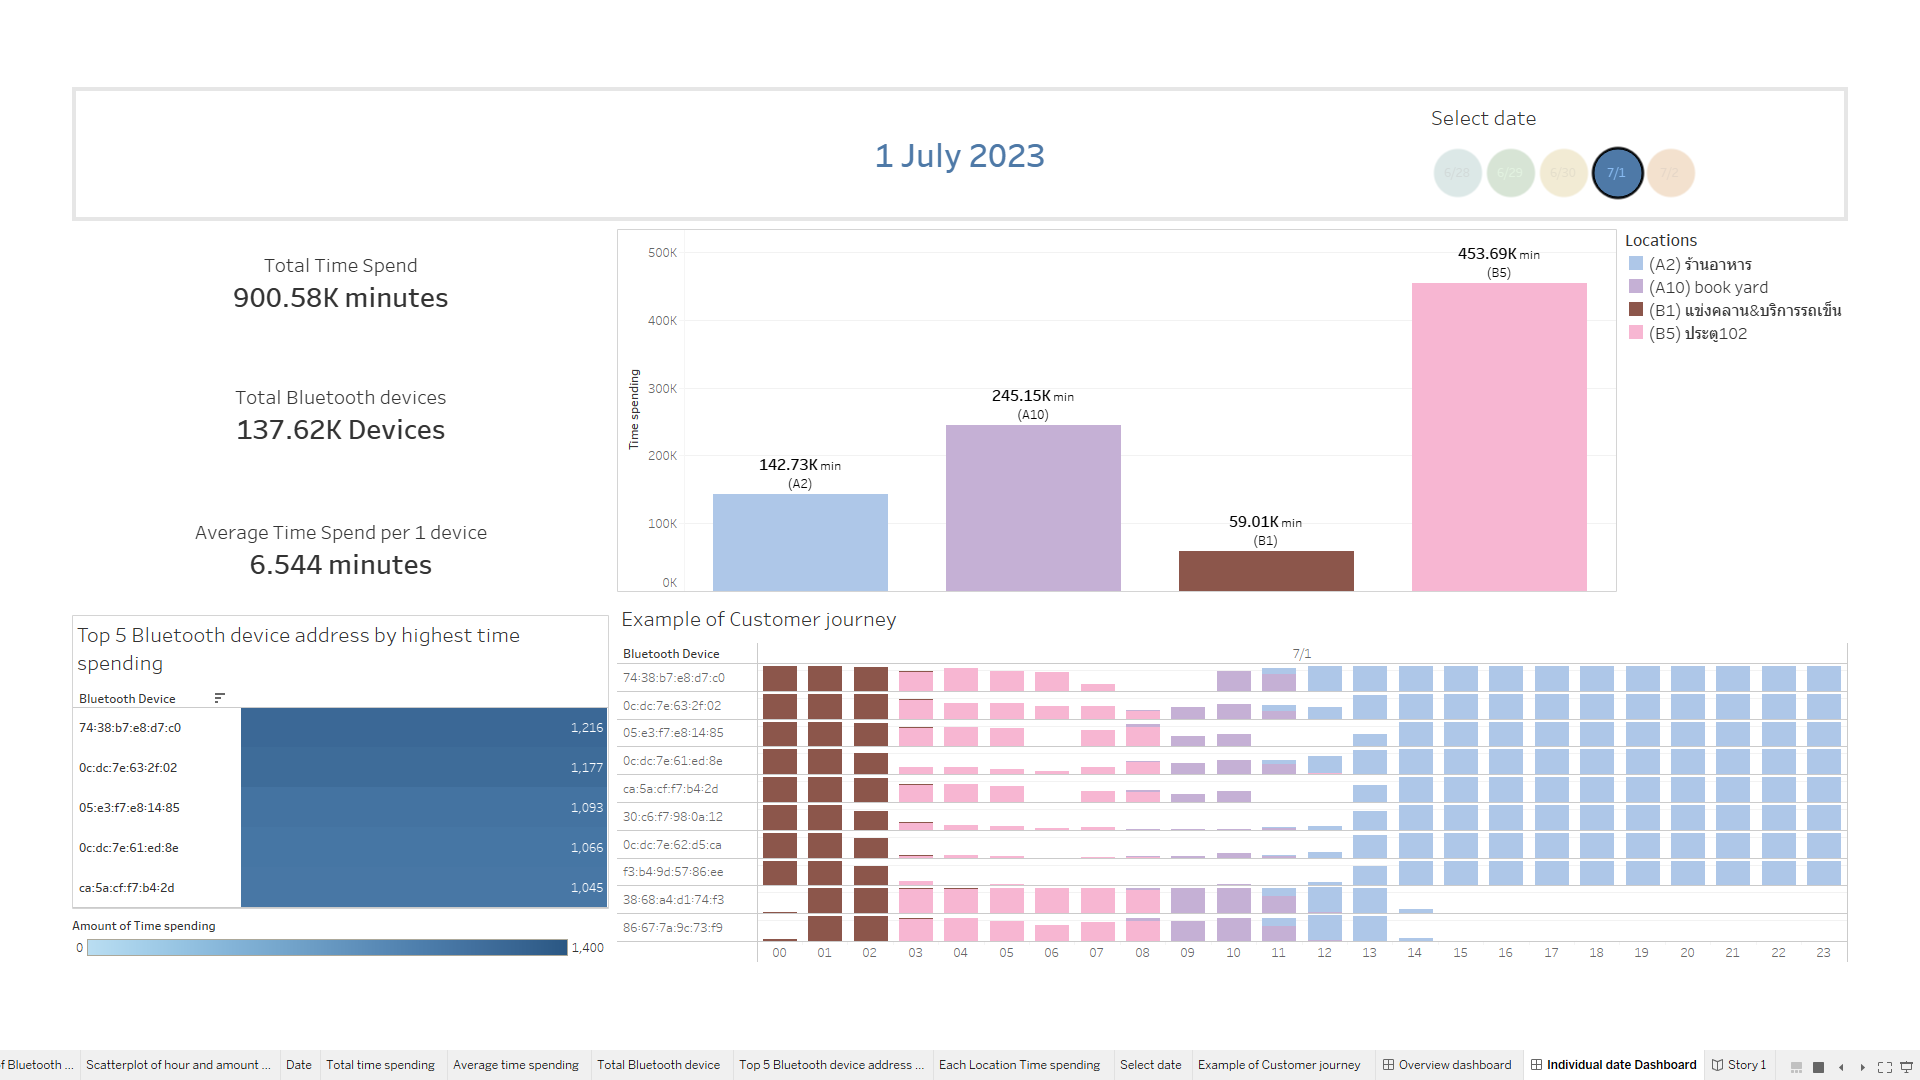

In [ ]:
img = Image.open('imgs/10.png')
display(img)

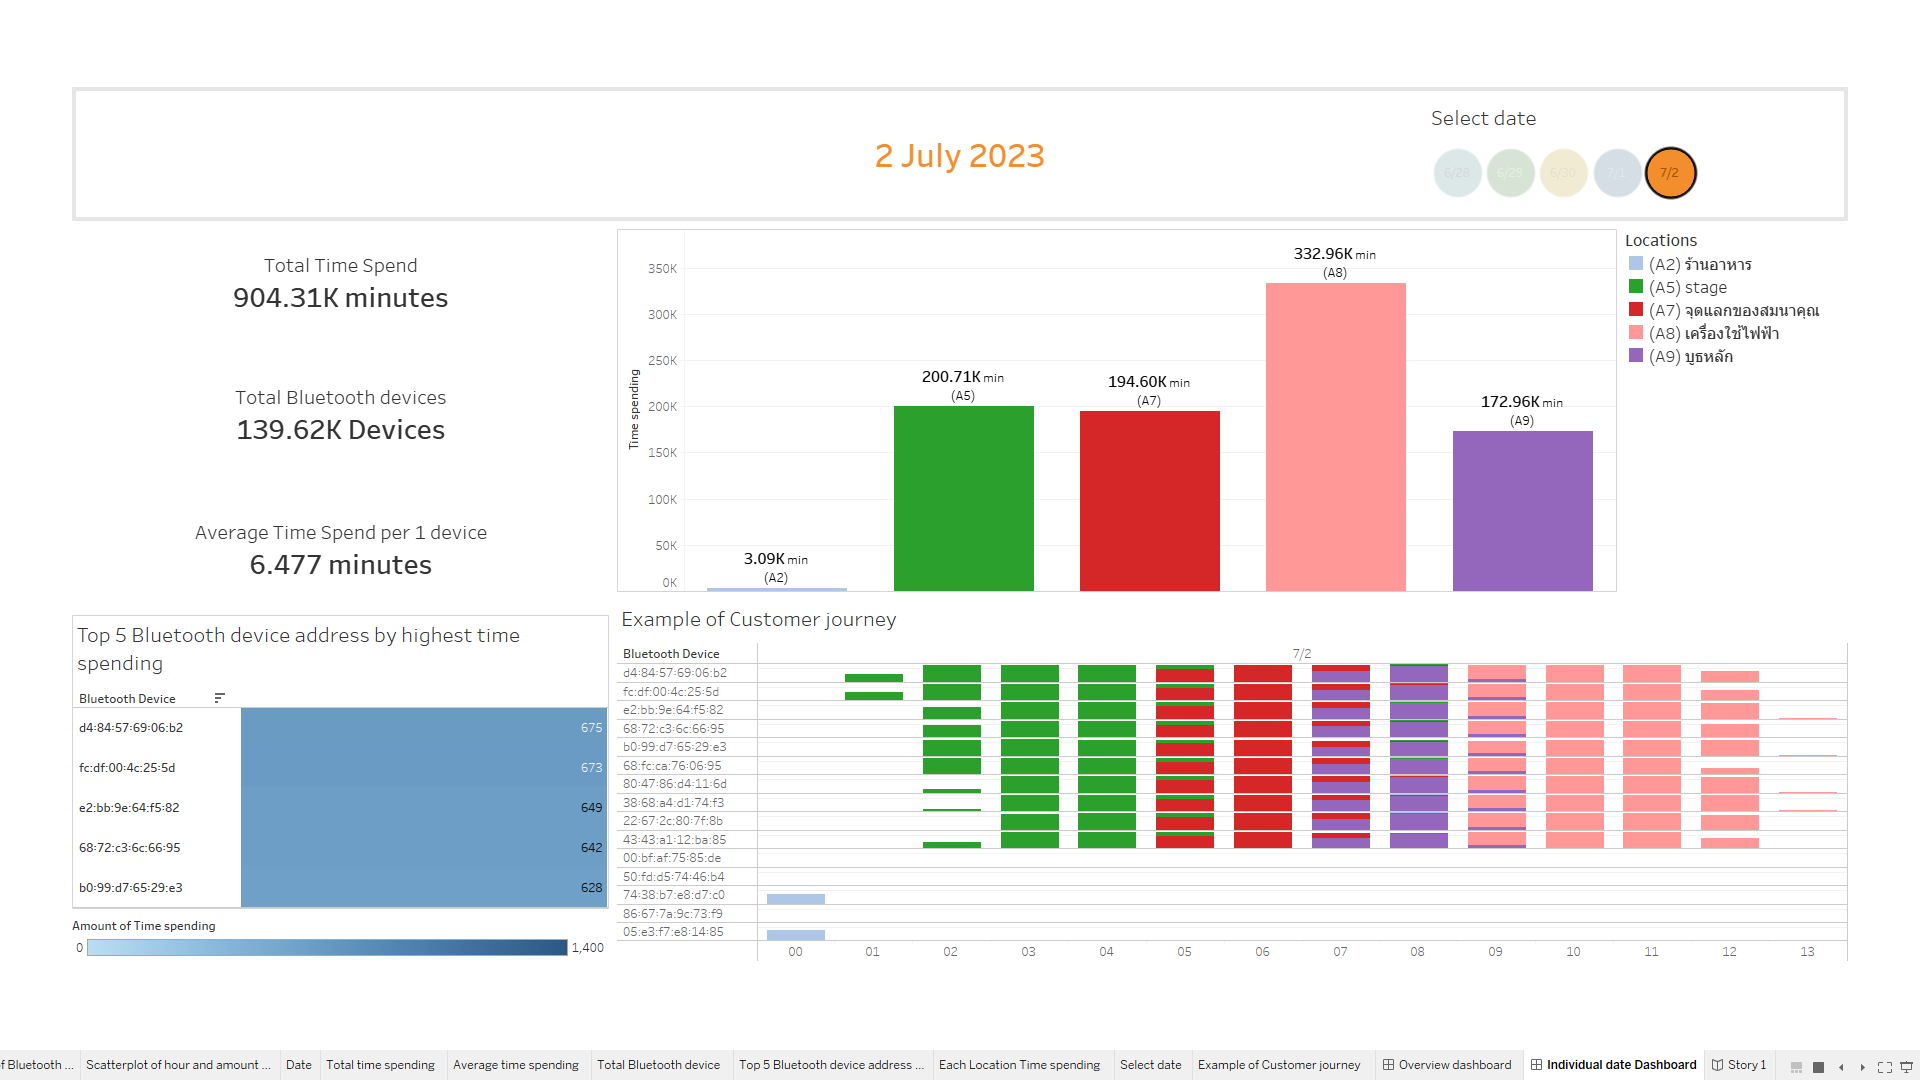

In [ ]:
img = Image.open('imgs/11.png')
display(img)

# query test

In [ ]:
df[df.address == 'ff:ff:ff:79:73:d0']

,address,date,time,hours,minutes,alias_with_location,alias,location
3541255,ff:ff:ff:79:73:d0,2023-06-29,10:58,10,58,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541256,ff:ff:ff:79:73:d0,2023-06-29,10:59,10,59,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541257,ff:ff:ff:79:73:d0,2023-06-29,11:00,11,0,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541258,ff:ff:ff:79:73:d0,2023-06-29,11:01,11,1,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541259,ff:ff:ff:79:73:d0,2023-06-29,11:02,11,2,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541260,ff:ff:ff:79:73:d0,2023-06-29,11:04,11,4,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541261,ff:ff:ff:79:73:d0,2023-06-29,11:06,11,6,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541262,ff:ff:ff:79:73:d0,2023-06-29,11:13,11,13,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541263,ff:ff:ff:79:73:d0,2023-06-29,11:14,11,14,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
3541264,ff:ff:ff:79:73:d0,2023-06-29,11:18,11,18,(A4) ทางเดินกลางงาน,A4,ทางเดินกลางงาน
